In [1]:

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import pathlib
import random

from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


import zipfile, os, shutil

dataset = '/content/gdrive/My Drive/colab/subset2.zip'
dst_path = '/content/subset2'
dst_file = os.path.join(dst_path, 'subset2.zip')

if not os.path.exists(dst_path):
  os.makedirs(dst_path)

shutil.copy(dataset, dst_file)

with zipfile.ZipFile(dst_file, 'r') as file:
  file.extractall(dst_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:

vgg16_model = tf.keras.applications.VGG16(weights = 'imagenet',
                                        include_top = False,
                                        input_shape=(150, 150, 3))
vgg16_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

train_dir = os.path.join(dst_path, 'train')
validation_dir = os.path.join(dst_path, 'validation')


train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                          target_size=(150, 150),
                                          batch_size=20,
                                          class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                          target_size=(150, 150),
                                          batch_size=20,
                                          class_mode='sparse')
'''
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(directory,
                                          target_size=(150, 150),
                                          batch_size=batch_size,
                                          class_mode='sparse')
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i*batch_size: (i+1)*batch_size] = features_batch
    labels[i*batch_size: (i+1)*batch_size] = labels_batch
    i += 1
    if i*batch_size >= sample_count:
      break
  return features, labels

def extract_features1(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 1664))
  labels = np.zeros(shape=(sample_count))
  generator = datagen1.flow_from_directory(directory,
                                          target_size=(150, 150),
                                          batch_size=batch_size,
                                          class_mode='sparse')
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i*batch_size: (i+1)*batch_size] = features_batch
    labels[i*batch_size: (i+1)*batch_size] = labels_batch
    i += 1
    if i*batch_size >= sample_count:
      break
  return features, labels
  

train_features, train_labels = extract_features(train_dir, 1967)
validation_features, validation_labels = extract_features1(validation_dir, 533)


'''
# reshape
#train_features = np.reshape(train_features, (1507, 4*4*512))
#validation_features = np.reshape(validation_features, (187, 4*4*512))

Found 1967 images belonging to 40 classes.
Found 533 images belonging to 40 classes.


"\nbatch_size = 20\n\ndef extract_features(directory, sample_count):\n  features = np.zeros(shape=(sample_count, 4, 4, 512))\n  labels = np.zeros(shape=(sample_count))\n  generator = datagen.flow_from_directory(directory,\n                                          target_size=(150, 150),\n                                          batch_size=batch_size,\n                                          class_mode='sparse')\n  i=0\n  for inputs_batch, labels_batch in generator:\n    features_batch = conv_base.predict(inputs_batch)\n    features[i*batch_size: (i+1)*batch_size] = features_batch\n    labels[i*batch_size: (i+1)*batch_size] = labels_batch\n    i += 1\n    if i*batch_size >= sample_count:\n      break\n  return features, labels\n\ndef extract_features1(directory, sample_count):\n  features = np.zeros(shape=(sample_count, 4, 4, 1664))\n  labels = np.zeros(shape=(sample_count))\n  generator = datagen1.flow_from_directory(directory,\n                                          target_size

In [8]:
import tensorflow as tf

model = tf.keras.Sequential()

for layer in vgg16_model.layers[:-1]: # just exclude last layer from copying
    model.add(layer)
    
for layer in vgg16_model.layers:
    layer.trainable = False

model.add(tf.keras.layers.Conv2D(filters=1024, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(40, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)       2

In [9]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(1e-5), ##hyperparameter
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])
              
history = model.fit(train_generator,
                    epochs=100, 
                    batch_size=20, 
                    validation_data=validation_generator)

Epoch 1/100
99/99 [==============================] - 16s 164ms/step - loss: 3.6250 - acc: 0.0585 - val_loss: 3.4949 - val_acc: 0.1276
Epoch 2/100
99/99 [==============================] - 15s 156ms/step - loss: 3.4227 - acc: 0.1429 - val_loss: 3.3304 - val_acc: 0.1388
Epoch 3/100
99/99 [==============================] - 16s 159ms/step - loss: 3.2595 - acc: 0.1876 - val_loss: 3.1747 - val_acc: 0.1670
Epoch 4/100
99/99 [==============================] - 16s 160ms/step - loss: 3.1026 - acc: 0.2430 - val_loss: 3.0325 - val_acc: 0.1857
Epoch 5/100
99/99 [==============================] - 16s 159ms/step - loss: 2.9590 - acc: 0.2842 - val_loss: 2.9009 - val_acc: 0.2552
Epoch 6/100
99/99 [==============================] - 16s 157ms/step - loss: 2.8250 - acc: 0.3386 - val_loss: 2.7862 - val_acc: 0.2627
Epoch 7/100
99/99 [==============================] - 15s 155ms/step - loss: 2.7079 - acc: 0.3645 - val_loss: 2.6772 - val_acc: 0.3583
Epoch 8/100
99/99 [==============================] - 16s 158ms

In [4]:
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded=files.upload()
img = Image.open(BytesIO(uploaded['당근.jpg'])).resize((150, 150)) # 이미지 불러오기 및 resize
img_arr = np.asarray(img)[:, :, :3] / 255 # 정규화
img_array = np.expand_dims(img_arr, 0) # 입력 형태를 맞춰주기 위해 차원 추가, 즉 [1, 160, 160, 3] 형태임



Saving 당근.jpg to 당근.jpg


In [10]:

get_output = tf.keras.backend.function([model.layers[0].input],
                                       [model.layers[-3].output, model.layers[-1].output])
[conv_outputs, predictions] = get_output([img_array])
class_weights = model.layers[-1].get_weights()[0]

output = []
for num, idx in enumerate(np.argmax(predictions,axis=1)):
    cam = tf.matmul(np.expand_dims(class_weights[:,idx],axis = 0),
                    np.transpose(np.reshape(conv_outputs[num],(9*9,1024))))
    cam = tf.keras.backend.eval(cam)
    output.append(cam)

    cam = np.reshape(cam,(9,9)) # 2차원으로 변형
cam = (cam - np.min(cam))/(np.max(cam)-np.min(cam)) # 0~1 사이로 정규화
cam = np.expand_dims(np.uint8(255 * cam), axis=2) # 0 ~ 255 사이로 정규화 및 차원 추가
cam = cv2.applyColorMap(cv2.resize(cam, (150, 150)), cv2.COLORMAP_JET)
# 컬러맵 처리 및 원본 이미지 크기와 맞춤
cam = cv2.cvtColor(cam, cv2.COLOR_BGR2RGB) # RGB로 바꿈

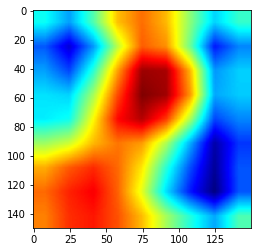

In [11]:

imgplot = plt.imshow(cam)

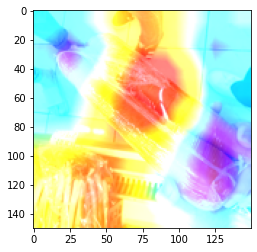

In [12]:
#img->np.array(img)해서 오류해결
result=cv2.add(cam,np.array(img))
plt.imshow(result)